- nomic-embed-text -> 768 
- mxbai-embed-large -> 1024 
- jina/jina-embeddings-v2-base-en -> 768 
- snowflake-arctic-embed -> 1024 
- sentence-transformers/all-MiniLM-l6-v2 -> 384 
- sentence-transformers/all-MiniLM-l12-v2 -> 384 
- sentence-transformers/all-mpnet-base-v2 -> 768 

In [1]:
import pandas as pd
from collections import Counter

from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings

from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import DirectoryLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [2]:
loader = DirectoryLoader("../paul_graham_essays/all/")
documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
texts = text_splitter.split_documents(documents)

In [3]:
print(len(texts))

4287


In [4]:
texts2 = []
for txt in texts:
    if len(txt.page_content) > 100:
        texts2.append(txt)
print(len(texts2))    

4069


In [5]:
llm_embed = OllamaEmbeddings(model="nomic-embed-text", show_progress=True)
# llm_embed = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-l6-v2",
#                                   show_progress=True)

db = FAISS.from_documents(texts2, llm_embed)
retriever = db.as_retriever(search_kwargs={"k": 1})

/Users/sridharkannam/anaconda3/envs/py99/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/Users/sridharkannam/anaconda3/envs/py99/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/Users/sridharkannam/anaconda3/envs/py99/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `Tru

Batches:   0%|          | 0/128 [00:00<?, ?it/s]

In [6]:
docs = retriever.invoke("What does Paul Graham say about the relationship between startups and risk?")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print(docs)

[Document(page_content="appetite for risk doesn't merely kill off larval startups, but kills off the most promising ones especially. Startups yield faster growth at greater risk than established companies. Does this trend also hold among startups? That is, are the riskiest startups the ones that generate most growth if they succeed? I suspect the answer is yes. And that's a chilling thought, because it means that if you cut investors' appetite for risk, the most beneficial startups are the first to go. Not all rich people got that way from startups, of course.", metadata={'source': '../paul_graham_essays/all/inequality.txt'})]


In [8]:
llms = [
        "nomic-embed-text",
        "mxbai-embed-large",
        "jina/jina-embeddings-v2-base-en",
        "snowflake-arctic-embed",
        "sentence-transformers/all-MiniLM-l6-v2",
        "sentence-transformers/all-MiniLM-l12-v2",
        "sentence-transformers/all-mpnet-base-v2" 
       ]

In [ ]:
for llm in llms:
    print(llm)
    ret_docs = []
    if "sentence-transformers" in llm:
        llm_embed = HuggingFaceEmbeddings(
            model_name=llm,
            show_progress=False)
    else:
        llm_embed = OllamaEmbeddings(
            model=llm, 
            show_progress=False)
    
    db = FAISS.from_documents(texts2, llm_embed)
    db_name = "vector_dbs/" + llm.split("/")[-1]
    db.save_local(db_name)

In [9]:
!ls vector_dbs/*/

vector_dbs/all-MiniLM-l12-v2/:
index.faiss index.pkl

vector_dbs/all-MiniLM-l6-v2/:
index.faiss index.pkl

vector_dbs/all-mpnet-base-v2/:
index.faiss index.pkl

vector_dbs/jina-embeddings-v2-base-en/:
index.faiss index.pkl

vector_dbs/mxbai-embed-large/:
index.faiss index.pkl

vector_dbs/nomic-embed-text/:
index.faiss index.pkl

vector_dbs/snowflake-arctic-embed/:
index.faiss index.pkl


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
questions = [
    "What does Paul Graham say about the relationship between startups and risk?",
    "According to Paul Graham, how should one approach the process of generating startup ideas?",
    "What are the key factors Paul Graham believes contribute to the success of a startup?",
    "How does Paul Graham describe the role of determination and perseverance in entrepreneurial success?",
    "What insights does Paul Graham offer on the concept of wealth and its creation?",
    "What is Paul Graham's view on the importance of doing things that don't scale?",
    "How does Paul Graham define a 'startup'?",
    "What are the key reasons Paul Graham believes most startups fail?",
    "What does Paul Graham say about the importance of 'iteration' in a startup?",
    "How does Paul Graham describe the concept of 'Ramen profitability'?",
    "What is Paul Graham's advice on choosing the right market for a startup?",
    "How does Paul Graham view the relationship between innovation and risk?",
    "What does Paul Graham say about the importance of a 'mission' in a startup?",
    "How does Paul Graham define 'organic growth' in a startup?",
    "What are Paul Graham's thoughts on the role of 'determination' in entrepreneurship?",
    "What does Paul Graham say about the significance of 'focus' for a startup?",
    "How does Paul Graham advise startups to deal with large competitors?",
    "What is Paul Graham's perspective on the role of 'timing' in a startup's success?",
    "How does Paul Graham explain the concept of 'default alive' versus 'default dead'?",
    "What are Paul Graham's thoughts on the role of 'software' in startup innovation?",
    "How does Paul Graham describe the importance of 'customer feedback'?",
    "What does Paul Graham believe about the impact of 'product design' on a startup?",
    "How does Paul Graham view the role of 'work-life balance' in entrepreneurship?",
    "What advice does Paul Graham give on handling 'growth' in a startup?",
    "How does Paul Graham define the concept of 'hard problems' in startups?",
    "What does Paul Graham say about the importance of 'founder control'?",
    "How does Paul Graham explain the role of 'speed' in a startup's operations?",
    "What are Paul Graham's views on 'bootstrapping' a startup?",
    "How does Paul Graham describe the relationship between 'technology' and 'disruption'?",
    "What is Paul Graham's perspective on 'copying' versus 'innovating' in a startup?",
    "How does Paul Graham define 'hustle' in the context of startups?",
    "What does Paul Graham believe about the importance of 'early adopters'?",
    "How does Paul Graham explain the concept of 'pivoting' in a startup?",
    "What advice does Paul Graham give about 'fundraising' for startups?",
    "How does Paul Graham view the role of 'mentorship' in a startup's growth?",
    "What are Paul Graham's thoughts on 'scaling' a startup?",
    "How does Paul Graham define 'ambition' in entrepreneurship?",
    "What does Paul Graham say about the importance of 'learning from users'?",
    "How does Paul Graham describe the importance of 'networking' for founders?",
    "What advice does Paul Graham give on 'hiring' for startups?",
    "How does Paul Graham explain the concept of 'the idea maze'?",
    "What does Paul Graham consider to be the most important quality in a startup founder?",
    "How does Paul Graham define the concept of 'schlep blindness'?",
    "What are Paul Graham's thoughts on the importance of choosing the right co-founders?",
    "How does Paul Graham describe the difference between 'makers' and 'managers'?",
    "What advice does Paul Graham give about how to handle competition in a startup?",
    "According to Paul Graham, what are the characteristics of a successful startup idea?",
    "What does Paul Graham say about the role of luck in a startup's success?",
    "How does Paul Graham explain the concept of hacker culture?",
    "How does Paul Graham suggest dealing with failure in a startup?",
    ]

len(questions)

50

In [27]:
df = pd.DataFrame()
df['question'] = questions

for llm in llms:
    ret_docs = []
    print(llm)
    
    if "sentence-transformers" in llm:
        llm_embed = HuggingFaceEmbeddings(
            model_name=llm,
            show_progress=False)
    else:
        llm_embed = OllamaEmbeddings(
            model=llm, 
            show_progress=False)
        
        
    db_name = "vector_dbs/" + llm.split("/")[-1]
    db = FAISS.load_local(db_name, llm_embed, allow_dangerous_deserialization=True)
    retriever = db.as_retriever(search_kwargs={"k": 1})
    
    for que in questions:
        ret_doc = retriever.invoke(que)
        ret_doc = ret_doc[0].page_content
        ret_docs.append(ret_doc)
    
    model = llm.split("/")[-1]
    df[model] = ret_docs

nomic-embed-text
mxbai-embed-large
jina/jina-embeddings-v2-base-en
snowflake-arctic-embed
sentence-transformers/all-MiniLM-l6-v2


/Users/sridharkannam/anaconda3/envs/py99/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


sentence-transformers/all-MiniLM-l12-v2


/Users/sridharkannam/anaconda3/envs/py99/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


sentence-transformers/all-mpnet-base-v2


/Users/sridharkannam/anaconda3/envs/py99/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
df.head(50)

,question,nomic-embed-text,mxbai-embed-large,jina-embeddings-v2-base-en,snowflake-arctic-embed,all-MiniLM-l6-v2,all-MiniLM-l12-v2,all-mpnet-base-v2
0,What does Paul Graham say about the relationsh...,appetite for risk doesn't merely kill off larv...,"If by the next time you need to raise money, y...","This is a good plan for someone with kids, bec...",be most productive when they're paid in propor...,appetite for risk doesn't merely kill off larv...,appetite for risk doesn't merely kill off larv...,programmers who wanted to start businesses to ...
1,"According to Paul Graham, how should one appro...",Want to start a startup? Get funded by Y Combi...,Want to start a startup? Get funded by Y Combi...,It was obvious to us as programmers that these...,ideas of that type are so valuable that all th...,If you look at how famous startups got started...,And it turns out that was all you needed to so...,Which leads to our sixth and last counterintui...
2,What are the key factors Paul Graham believes ...,"on a great idea."" [6] When we predict good out...",it work? One advantage of investing in a large...,If the partners are sufficiently convinced tha...,One of the most valuable exercises you can try...,"on a great idea."" [6] When we predict good out...",Want to start a startup? Get funded by Y Combi...,is the recipe for success. But though other fi...
3,How does Paul Graham describe the role of dete...,further next time. So here in sum is how deter...,To succeed in a domain that violates your intu...,"It worries me a bit to be saying this, because...",tell them how to start a startup. Maybe they'd...,is the recipe for success. But though other fi...,[3]Note too that determination and talent are ...,[3]Note too that determination and talent are ...
4,What insights does Paul Graham offer on the co...,"Adam Smith (Wealth of Nations, v:i) mentions s...",childhood the idea that there is a fixed amoun...,This is an interesting sort of wealth to study...,you very precise numbers about variation in we...,man of the nineteenth century was not a courti...,"Adam Smith (Wealth of Nations, v:i) mentions s...",Money is just a convenient way of trading one ...
5,What is Paul Graham's view on the importance o...,"Written by Paul Graham\n\nWriting, Briefly\n\...",Written by Paul Graham\n\nHow to Get New Ideas...,to think about that. The public conversation s...,It's hard to say whether advantages like lack ...,passing importance. But I'm uncomfortably awar...,passing importance. But I'm uncomfortably awar...,The examples he gives are convincing: an ordin...
6,How does Paul Graham define a 'startup'?,by Y Combinator. A startup is a company design...,"sense (what used to be called ""high technology...",Starting a startup is thus very much like deci...,"never going to go anywhere, and yet glorifying...",is to do things that don't scale. A lot of wou...,is to do things that don't scale. A lot of wou...,is to do things that don't scale. A lot of wou...
7,What are the key reasons Paul Graham believes ...,"be fine, whatever else you do or don't do. And...",Want to start a startup? Get funded by Y Combi...,"I have no idea how wide this band is, but if t...",One of the most valuable exercises you can try...,"I have no idea how wide this band is, but if t...",You hear all kinds of reasons why startups fai...,"It worries me a bit to be saying this, because..."
8,What does Paul Graham say about the importance...,algorithm that may get you nothing more than a...,algorithm that may get you nothing more than a...,And that's exciting because it means lots more...,One of the most valuable exercises you can try...,MinimalLots of founders mentioned how importan...,of asynchronously as it had always been done b...,programmers who wanted to start businesses to ...
9,How does Paul Graham describe the concept of '...,"""ramen profitable"" to describe the situation w...","profitable after 2 months, even though its rev...",Whereas if you can choose when you raise money...,If 

In [29]:
def most_common(lst):
    count = Counter(lst)
    most_common_val, freq = count.most_common(1)[0]
    if list(count.values()).count(freq) > 1:  # Check for ties
        return pd.Series([None, None])  # tie  - return None
    return pd.Series([most_common_val, freq])



#df['voting_winner'] = df.apply(lambda row: most_common(row), axis=1)
df[['voting_winner', 'voting_count']] = df.apply(lambda row: most_common(row), axis=1)
#df[['voting_winner', 'voting_count']] = df.apply(most_common, axis=1)


In [30]:
df.head(50)

,question,nomic-embed-text,mxbai-embed-large,jina-embeddings-v2-base-en,snowflake-arctic-embed,all-MiniLM-l6-v2,all-MiniLM-l12-v2,all-mpnet-base-v2,voting_winner,voting_count
0,What does Paul Graham say about the relationsh...,appetite for risk doesn't merely kill off larv...,"If by the next time you need to raise money, y...","This is a good plan for someone with kids, bec...",be most productive when they're paid in propor...,appetite for risk doesn't merely kill off larv...,appetite for risk doesn't merely kill off larv...,programmers who wanted to start businesses to ...,appetite for risk doesn't merely kill off larv...,3.0
1,"According to Paul Graham, how should one appro...",Want to start a startup? Get funded by Y Combi...,Want to start a startup? Get funded by Y Combi...,It was obvious to us as programmers that these...,ideas of that type are so valuable that all th...,If you look at how famous startups got started...,And it turns out that was all you needed to so...,Which leads to our sixth and last counterintui...,Want to start a startup? Get funded by Y Combi...,2.0
2,What are the key factors Paul Graham believes ...,"on a great idea."" [6] When we predict good out...",it work? One advantage of investing in a large...,If the partners are sufficiently convinced tha...,One of the most valuable exercises you can try...,"on a great idea."" [6] When we predict good out...",Want to start a startup? Get funded by Y Combi...,is the recipe for success. But though other fi...,"on a great idea."" [6] When we predict good out...",2.0
3,How does Paul Graham describe the role of dete...,further next time. So here in sum is how deter...,To succeed in a domain that violates your intu...,"It worries me a bit to be saying this, because...",tell them how to start a startup. Maybe they'd...,is the recipe for success. But though other fi...,[3]Note too that determination and talent are ...,[3]Note too that determination and talent are ...,[3]Note too that determination and talent are ...,2.0
4,What insights does Paul Graham offer on the co...,"Adam Smith (Wealth of Nations, v:i) mentions s...",childhood the idea that there is a fixed amoun...,This is an interesting sort of wealth to study...,you very precise numbers about variation in we...,man of the nineteenth century was not a courti...,"Adam Smith (Wealth of Nations, v:i) mentions s...",Money is just a convenient way of trading one ...,"Adam Smith (Wealth of Nations, v:i) mentions s...",2.0
5,What is Paul Graham's view on the importance o...,"Written by Paul Graham\n\nWriting, Briefly\n\...",Written by Paul Graham\n\nHow to Get New Ideas...,to think about that. The public conversation s...,It's hard to say whether advantages like lack ...,passing importance. But I'm uncomfortably awar...,passing importance. But I'm uncomfortably awar...,The examples he gives are convincing: an ordin...,passing importance. But I'm uncomfortably awar...,2.0
6,How does Paul Graham define a 'startup'?,by Y Combinator. A startup is a company design...,"sense (what used to be called ""high technology...",Starting a startup is thus very much like deci...,"never going to go anywhere, and yet glorifying...",is to do things that don't scale. A lot of wou...,is to do things that don't scale. A lot of wou...,is to do things that don't scale. A lot of wou...,is to do things that don't scale. A lot of wou...,3.0
7,What are the key reasons Paul Graham believes ...,"be fine, whatever else you do or don't do. And...",Want to start a startup? Get funded by Y Combi...,"I have no idea how wide this band is, but if t...",One of the most valuable exercises you can try...,"I have no idea how wide this band is, but if t...",You hear all kinds of reasons why startups fai...,"It worries me a bit to be saying this, because...","I have no idea how wide this band is, but if t...",2.0
8,What does Paul Graham say about the importance...,algorithm that may get you nothing more than a...,algorithm that may get you nothing more than 

In [31]:
# drop tie
df = df.dropna(subset=['voting_winner'])

# which model got the most answers correct
correct_counts = {}
for model in df.columns[1:-1]:  
    correct_counts[model] = (df[model] == df['voting_winner']).sum()

df_perf = pd.DataFrame(list(correct_counts.items()), columns=['Model', 'Correct_Counts'])
df_perf['Percentage_Correct'] = 100*df_perf['Correct_Counts']/len(df)
df_perf['Percentage_Correct'] = df_perf['Percentage_Correct'].apply(lambda x:round(x,2))

df_perf = df_perf.sort_values(by='Correct_Counts', ascending=False)

df_perf.head(10)

,Model,Correct_Counts,Percentage_Correct
7,voting_winner,36,100.00
5,all-MiniLM-l12-v2,23,63.89
4,all-MiniLM-l6-v2,21,58.33
6,all-mpnet-base-v2,20,55.56
0,nomic-embed-text,14,38.89
1,mxbai-embed-large,9,25.00
2,jina-embeddings-v2-base-en,9,25.00
3,snowflake-arctic-embed,1,2.78


In [32]:
len(df)

36

In [33]:
import matplotlib.pyplot as plt


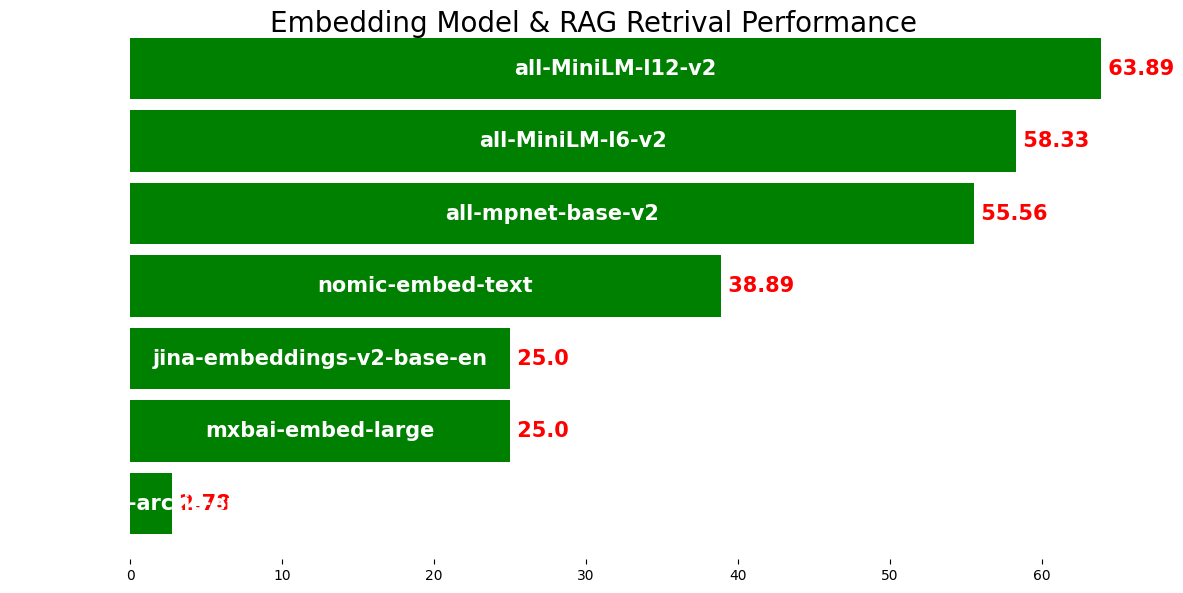

In [34]:
#df_perf = df_perf[df_sorted['Percentage_Correct'] != 0]
df_perf = df_perf.sort_values('Percentage_Correct', ascending=True)
df_perf = df_perf[df_perf['Percentage_Correct'] != 100.0]


# Create the plot with a transparent figure
fig, ax = plt.subplots(figsize=(12, 6), facecolor='none', edgecolor='none')
fig.patch.set_alpha(0)

# Create horizontal bar plot
bars = ax.barh(df_perf['Model'], df_perf['Percentage_Correct'], height=0.85, color="green"
              )

# Remove y-axis labels
ax.set_yticks([])

# Remove the frame
for spine in ax.spines.values():
    spine.set_visible(False)

# Add count labels to the end of each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f' {width}', 
            ha='left', va='center', fontweight='bold', fontsize=15, color='red')

# Add name labels inside each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width/2, bar.get_y() + bar.get_height()/2, df_perf['Model'].iloc[i], 
            ha='center', va='center', fontweight='bold', fontsize=15, color='white')

# Set the title
#ax.set_title('Count by Name', fontsize=16, fontweight='bold', pad=20)

# Remove x-axis label
ax.set_xlabel('')

# Set the background of the axis to transparent
ax.patch.set_alpha(0)

# Adjust layout and display the plot
plt.tight_layout()

plt.suptitle("Embedding Model & RAG Retrival Performance", fontsize=20)
# Save the figure with transparent background
plt.savefig('summary1.png', dpi=300, bbox_inches='tight', transparent=True)

# Display the plot (optional, remove if you only want to save the file)
plt.show()

In [37]:
#df2 = df.copy()
df = df.drop(columns=["voting_winner", "voting_count"])
df = df.drop(columns=["all-MiniLM-l6-v2", "all-mpnet-base-v2"])
df.head()

,question,nomic-embed-text,mxbai-embed-large,jina-embeddings-v2-base-en,snowflake-arctic-embed,all-MiniLM-l12-v2
0,What does Paul Graham say about the relationsh...,appetite for risk doesn't merely kill off larv...,"If by the next time you need to raise money, y...","This is a good plan for someone with kids, bec...",be most productive when they're paid in propor...,appetite for risk doesn't merely kill off larv...
1,"According to Paul Graham, how should one appro...",Want to start a startup? Get funded by Y Combi...,Want to start a startup? Get funded by Y Combi...,It was obvious to us as programmers that these...,ideas of that type are so valuable that all th...,And it turns out that was all you needed to so...
2,What are the key factors Paul Graham believes ...,"on a great idea."" [6] When we predict good out...",it work? One advantage of investing in a large...,If the partners are sufficiently convinced tha...,One of the most valuable exercises you can try...,Want to start a startup? Get funded by Y Combi...
3,How does Paul Graham describe the role of dete...,further next time. So here in sum is how deter...,To succeed in a domain that violates your intu...,"It worries me a bit to be saying this, because...",tell them how to start a startup. Maybe they'd...,[3]Note too that determination and talent are ...
4,What insights does Paul Graham offer on the co...,"Adam Smith (Wealth of Nations, v:i) mentions s...",childhood the idea that there is a fixed amoun...,This is an interesting sort of wealth to study...,you very precise numbers about variation in we...,"Adam Smith (Wealth of Nations, v:i) mentions s..."


In [38]:
def most_common(lst):
    count = Counter(lst)
    most_common_val, freq = count.most_common(1)[0]
    if list(count.values()).count(freq) > 1:  # Check for ties
        return pd.Series([None, None])  # tie  - return None
    return pd.Series([most_common_val, freq])



#df['voting_winner'] = df.apply(lambda row: most_common(row), axis=1)
df[['voting_winner', 'voting_count']] = df.apply(lambda row: most_common(row), axis=1)
#df[['voting_winner', 'voting_count']] = df.apply(most_common, axis=1)


In [39]:
def most_common(lst):
    count = Counter(lst)
    most_common_val, freq = count.most_common(1)[0]
    if list(count.values()).count(freq) > 1:  # Check for ties
        return pd.Series([None, None])  # tie  - return None
    return pd.Series([most_common_val, freq])



#df['voting_winner'] = df.apply(lambda row: most_common(row), axis=1)
df[['voting_winner', 'voting_count']] = df.apply(lambda row: most_common(row), axis=1)
#df[['voting_winner', 'voting_count']] = df.apply(most_common, axis=1)


In [40]:
# drop tie
df = df.dropna(subset=['voting_winner'])

# which model got the most answers correct
correct_counts = {}
for model in df.columns[1:-1]:  
    correct_counts[model] = (df[model] == df['voting_winner']).sum()

df_perf = pd.DataFrame(list(correct_counts.items()), columns=['Model', 'Correct_Counts'])
df_perf['Percentage_Correct'] = 100*df_perf['Correct_Counts']/len(df)
df_perf['Percentage_Correct'] = df_perf['Percentage_Correct'].apply(lambda x:round(x,2))

df_perf = df_perf.sort_values(by='Correct_Counts', ascending=False)

df_perf.head(10)

,Model,Correct_Counts,Percentage_Correct
5,voting_winner,17,100.00
0,nomic-embed-text,13,76.47
4,all-MiniLM-l12-v2,11,64.71
1,mxbai-embed-large,7,41.18
2,jina-embeddings-v2-base-en,6,35.29
3,snowflake-arctic-embed,1,5.88


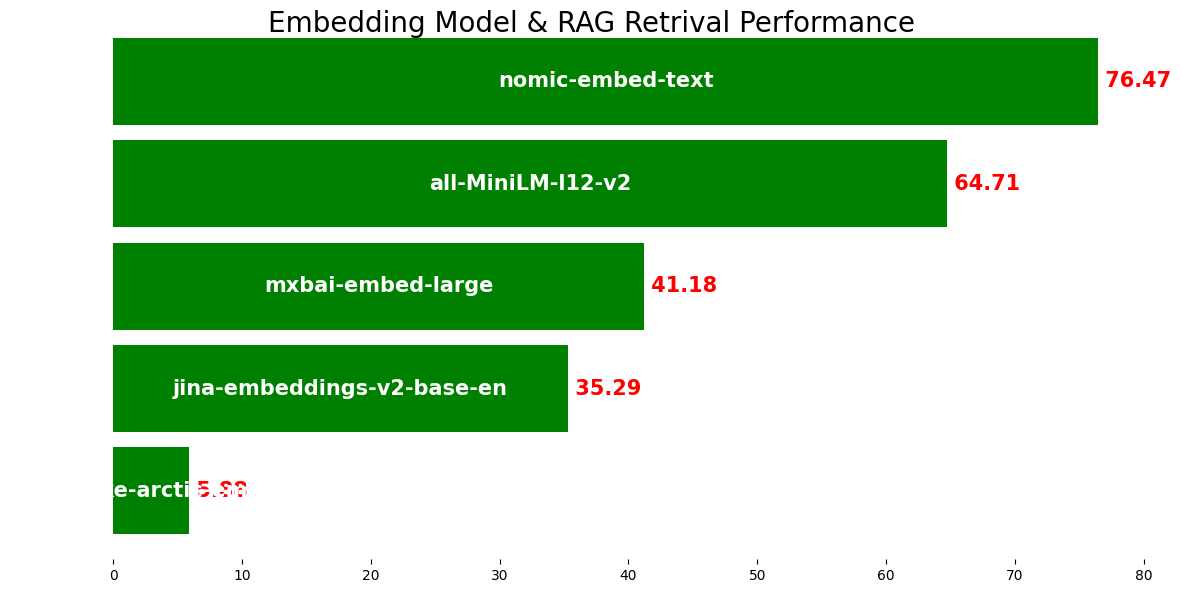

In [41]:
#df_perf = df_perf[df_sorted['Percentage_Correct'] != 0]
df_perf = df_perf.sort_values('Percentage_Correct', ascending=True)
df_perf = df_perf[df_perf['Percentage_Correct'] != 100.0]

# Create the plot with a transparent figure
fig, ax = plt.subplots(figsize=(12, 6), facecolor='none', edgecolor='none')
fig.patch.set_alpha(0)

# Create horizontal bar plot
bars = ax.barh(df_perf['Model'], df_perf['Percentage_Correct'], height=0.85, color="green"
              )

# Remove y-axis labels
ax.set_yticks([])

# Remove the frame
for spine in ax.spines.values():
    spine.set_visible(False)

# Add count labels to the end of each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f' {width}', 
            ha='left', va='center', fontweight='bold', fontsize=15, color='red')

# Add name labels inside each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width/2, bar.get_y() + bar.get_height()/2, df_perf['Model'].iloc[i], 
            ha='center', va='center', fontweight='bold', fontsize=15, color='white')

# Set the title
#ax.set_title('Count by Name', fontsize=16, fontweight='bold', pad=20)

# Remove x-axis label
ax.set_xlabel('')

# Set the background of the axis to transparent
ax.patch.set_alpha(0)

# Adjust layout and display the plot
plt.tight_layout()

plt.suptitle("Embedding Model & RAG Retrival Performance", fontsize=20)
# Save the figure with transparent background
plt.savefig('summary.png', dpi=300, bbox_inches='tight', transparent=True)

# Display the plot (optional, remove if you only want to save the file)
plt.show()

In [35]:
for llm in llms:
    ret_docs = []
    print(llm)
    
    if "sentence-transformers" in llm:
        llm_embed = HuggingFaceEmbeddings(
            model_name=llm,
            show_progress=False)
    else:
        llm_embed = OllamaEmbeddings(
            model=llm, 
            show_progress=False)
        
    embds = llm_embed.embed_query("text")
    print(len(embds))

nomic-embed-text
768
mxbai-embed-large
1024
jina/jina-embeddings-v2-base-en
768
snowflake-arctic-embed
1024
sentence-transformers/all-MiniLM-l6-v2


/Users/sridharkannam/anaconda3/envs/py99/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


384
sentence-transformers/all-MiniLM-l12-v2
384
sentence-transformers/all-mpnet-base-v2
768
